K近邻算法(K Nearest Neighbour)
===

# 1. 讲义
## 1.1.原理
数据映射到高维空间中的点、找出K个最近的样本、投票结果<br/>
![images](images/01_001.png)

## 1.2.如何衡量距离
数学中距离满足三个要求：必须是正数、必须对称、满足三角不等式

## 1.3.常用的距离

### 1.3.1.闵可夫斯基距离 Minkowski
$$d_{ij}(q)=[\sum_{k=1}^p(x_{ik}-x_{jk})^q]^{\frac{1}{q}},q>0$$
其中q越大，差异越大的维度对最终距离影响越大。距离是范数的另外一种称呼
- 曼哈顿距离:q = 1，城市距离$d_{ij}=|X_1-X_2|+|Y_1-Y_2|$
- 欧氏距离：q = 2，直线距离$d_{ij}=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}$
- 切比雪夫距离:q趋近于无穷大，棋盘距离$d_{ij}=\lim\limits_{p\to\infty}(\sum_{i=1}^n|x_i-y_i|^p)^{\frac{1}{p}}=max|x_i-y_i|$

### 1.3.2.马氏距离
考虑数据分布<br/>
![images](images/01_002.png)

## 1.4.具体做法
就是计算出测试点与样本中的每个点的距离，找到一个导致最小距离的点，它的类别就是测试点的类别，这个距离的计算，一般使用欧氏距离。K近邻的意思是K个最近的点，如果K=1，那么就是找到离测试点最近的一个样本点，这个样本点是什么分类，那么测试点就是什么分类；如果K>1，那么就是找到离测试点最近的K个点，然后归纳出这些点的分类，看看哪一种分类的样本点最多，那么测试点就是哪一种分类。K越小，越容易发生过拟合

![images](images/01_003.png)

## 1.5.三种距离的实现

In [2]:
def computeMinkowskiDistance(vector1, vector2, q ):
    distance = 0.
    n = len(vector1)
    for i in range(n):
        distance += pow(abs(float(vector1[i]) - float(vector2[i])), q)
    return round(pow(distance, 1.0 / q), 5)

def computeManhattanDistance(vector1, vector2):
    return computeMinkowskiDistance(vector1, vector2, 1)

def computeEuDistance(vector1, vector2):
    return computeMinkowskiDistance(vector1, vector2, 2)

# 2.总结
KNN相较于其它很多算法一个很不明显不同的地方就是可以通过已有数据计算出结果,而无需进行训练和降低预测误差的反向传播过程,但是在现在的深度学习中这个过程则是必然存在的,所以反向传播的过程则是必然的.而TensorFlow的一个强大之处,就在于此处,对反向传播的自动求导,依靠计算图的机制,在我们使用TensorFlow进行深度学习的开发之时,只需要简单的定义损失函数以及通过一行简简单单的代码,选择要进行优化的损失函数之后,TensorFlow就可以对损失函数进行自动求导,训练我们所构建的计算图

# 3.Python Code实现K近邻算法

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
class KNN(object):
    def __init__(self,k=5):
        self.k = 5

    def _vote(self,neighbours):
        counts = np.bincount(neighbours[:, 1].astype('int'))
        return counts.argmax()

    def predict(self, x_test, x_train, y_train):
        y_pred = np.empty(X_test.shape[0])
        # 对每一个test进行循环
        for i,test in enumerate(X_test):
            neighbours = np.empty((X_train.shape[0],2))
            # 对每一个train进行计算
            for j, train in enumerate(X_train):
                dis = computeEuDistance(train,test)
                label = y_train[j]
                neighbours[j] = [dis,label]
            k_nearest_neighbors = neighbours[neighbours[:,0].argsort()][:self.k]
            label = self._vote(k_nearest_neighbors)
            y_pred[i] = label
        return y_pred

In [7]:
data = datasets.load_iris()
X = normalize(data.data)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf = KNN(k=5)
y_pred = clf.predict(X_test, X_train, y_train)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.92


# 4.使用KNN算法对鸢尾花数据集进行分类

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}


Text(0.5, 1.0, '鸢尾花数据的K近邻分类\n测试集准确度: 77.78%')

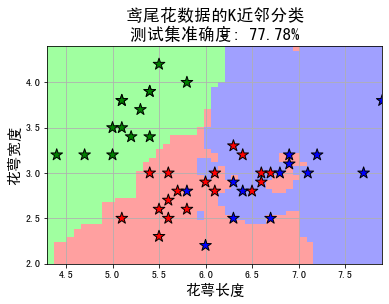

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib as mpl
import os

data_path = os.path.join("data")

# 花萼长度、花萼宽度，花瓣长度，花瓣宽度
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'

mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])

data = pd.read_csv(os.path.join(data_path, "iris.data"), header=None)
x = data[np.arange(4)]
y = pd.Categorical(data[4]).codes
x = x.iloc[:, :2]# 为了可视化，仅使用前两列特征
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=1)

nFolds = 4
random_state = 1234
metrics = ['minkowski','euclidean','manhattan']
weights = ['uniform','distance'] #10.0**np.arange(-5,4)
algorithm=['ball_tree','kd_tree','brute', 'auto']
numNeighbors = np.arange(5,10)
param_grid = dict(metric=metrics,weights=weights,n_neighbors=numNeighbors)
cv = StratifiedKFold(nFolds)
cv.get_n_splits(x_train, y_train)
classifier = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=cv)

classifier.fit(x_train, y_train)
y_test_hat = classifier.predict(x_test)
print(classifier.best_params_)
N, M = 50,50 # 横纵各采样多少个值
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

y_show_hat = classifier.predict(x_show)  # 预测值
y_show_hat = y_show_hat.reshape(x1.shape)  # 使之与输入的形状相同
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light)  # 预测值的显示
plt.scatter(x_test[0], x_test[1], c=y_test.ravel(), edgecolors='k', s=150, zorder=10, cmap=cm_dark, marker='*')  # 测试数据
plt.xlabel(iris_feature[0], fontsize=15)
plt.ylabel(iris_feature[1], fontsize=15)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(True)

plt.title(u'鸢尾花数据的K近邻分类\n测试集准确度: %.2f%%' % (100 * classifier.score(x_test, y_test)), fontsize=17)


# 5.使用KNN算法对watermelon数据集进行分类

All: [52.94117647 47.05882353]
Training: [54.54545455 45.45454545]
Test: [50. 50.]
{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}
1.0
Samples correctly classified:
[0 1 2 3 4 5]
Samples incorrectly classified:
[]


Text(0.5, 1.0, 'Watermelon Classification results')

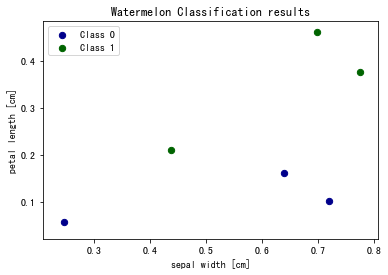

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import os

data_path = os.path.join("data")
dataLoad = pd.read_csv(os.path.join(data_path, "watermelon30a.txt"), header=None)
x,y = dataLoad.values[:, :-1], dataLoad[2].tolist()
y = pd.Categorical(y).codes
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.65, random_state=123,
                                                    stratify=y)

print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

metrics = ['minkowski','euclidean','manhattan']
weights = ['uniform','distance'] #10.0**np.arange(-5,4)
algorithm=['ball_tree','kd_tree','brute', 'auto']
numNeighbors = np.arange(1,4)
param_grid = dict(metric=metrics,weights=weights,n_neighbors=numNeighbors)
classifier =GridSearchCV(KNeighborsClassifier(), param_grid=param_grid)
classifier.fit(train_x, train_y)
pred_y = classifier.predict(test_x)

print(classifier.best_params_)

accuracy = np.sum(pred_y == test_y) / float(len(test_y))
print(accuracy)

print("Samples correctly classified:")
correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)

print("Samples incorrectly classified:")
incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)
colors = ["darkblue","darkgreen"]
plt.figure(facecolor='w')
for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_x[idx, 0],test_x[idx, 1],c=color, s =40, label="Class %s" % n)

plt.scatter(test_x[incorrect_idx, 0],test_x[incorrect_idx,1],c='darkred', s =40)
plt.xlabel("sepal width [cm]")
plt.ylabel("petal length [cm]")
plt.legend(loc="upper left")
plt.title("Watermelon Classification results")

# 6.使用KNN进行回归预测

{'metric': 'minkowski', 'n_neighbors': 4, 'weights': 'uniform'}


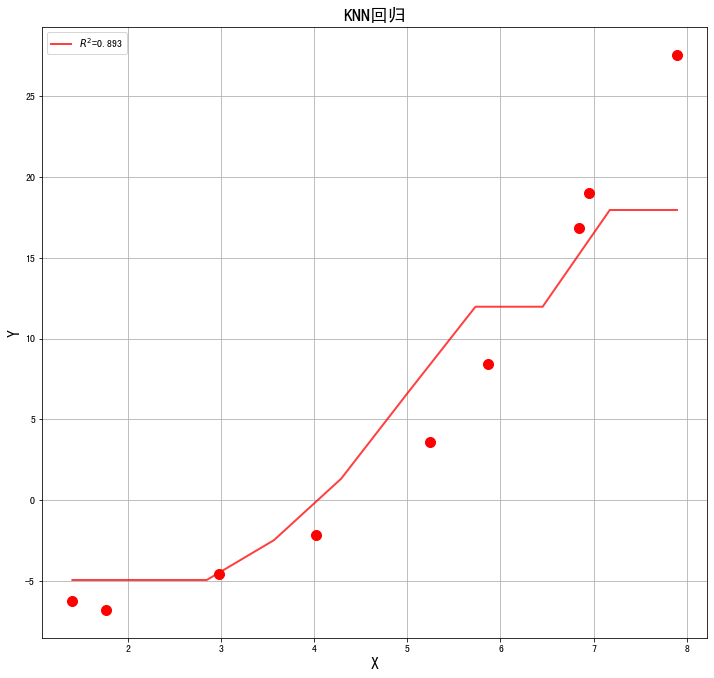

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

np.random.seed(0)
np.set_printoptions(linewidth=1000)
N = 9
x = np.array([1.40015721,1.76405235,2.97873798,4.02272212,5.2408932,5.86755799,6.84864279,6.95008842,7.89678115])
y = np.array([-6.22959012,-6.80028513,-4.58779845,-2.1475575,3.62506375,8.40186804,16.84301125,18.99745441,27.56686965])

x.shape = -1, 1
y.shape = -1, 1

metrics = ['minkowski','euclidean','manhattan']
weights = ['uniform','distance'] #10.0**np.arange(-5,4)
algorithm=['ball_tree','kd_tree','brute', 'auto']
numNeighbors = np.arange(4,6)
param_grid = dict(metric=metrics,weights=weights,n_neighbors=numNeighbors)
model = GridSearchCV(KNeighborsRegressor(),param_grid=param_grid)
model.fit(x, y)
print(model.best_params_)
x_hat = np.linspace(x.min(), x.max(), num=10)
x_hat.shape = -1, 1
y_hat = model.predict(x_hat)
plt.figure(figsize=(10, 10), facecolor='w')
plt.plot(x, y, 'ro', ms=10, zorder=N)
s = model.score(x, y)
label = u'$R^2$=%.3f' % (s)
plt.plot(x_hat, y_hat, color='r', lw=2, label=label, alpha=0.75)
plt.legend(loc='upper left')
plt.grid(True)
plt.title('KNN回归', fontsize=18)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)

plt.tight_layout(1, rect=(0, 0, 1, 0.95))